In [14]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense,Activation

In [2]:
data_path = "/content/drive/MyDrive/Research Works/COVID-19/data"
src = data_path + "/source/covid_confirmed_cleaned.csv"

In [3]:
df = pd.read_csv(src)

In [23]:
t = 14
data = df.loc[:,'2020-04-01':]
X = data.iloc[:,  :-t].to_numpy().T
Y = data.iloc[:, t:  ].to_numpy().T

In [24]:
n = X.shape[1]

In [17]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [26]:
model = Sequential()
model.add(Dense(2000, activation='relu'))
model.add(Dense(n))

model.compile(loss='mse', optimizer='adam',metrics=['mse'])

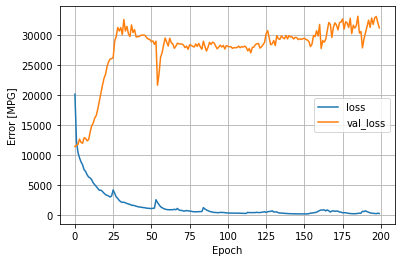

In [27]:
history = model.fit(
    X, Y,
    validation_split=0.1,
    verbose=0, epochs=200
)

plot_loss(history)